# Random stuff I want to play with

___

**Contents**
* RDKit
* Graph kernels
___

In [1]:
from rdkit import Chem

# import AllChem which strictly extends functionality of Chem
from rdkit.Chem import AllChem, Draw

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromSmiles('C1OC1')

In [25]:
m.GetBonds()[0]

In [26]:
m.GetNumAtoms()

3

In [27]:
m.GetNumHeavyAtoms()

3

In [28]:
for atom in m.GetAtoms():
    print(atom.GetSymbol())
    print("Neigbors:", [x.GetAtomicNum() for x in atom.GetNeighbors()])

C
Neigbors: [8, 6]
O
Neigbors: [6, 6]
C
Neigbors: [8, 6]


In [40]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')
template = Chem.MolFromSmiles('c1nccc2n1ccc2')

Need for sanitization:

In [75]:
fake_mol = Chem.MolFromSmiles('c1ccncc1')

In [76]:
fake_mol

In [78]:
fake_mol.GetAtomWithIdx(0).SetAtomicNum(8)

In [79]:
Chem.SanitizeMol(fake_mol)

ValueError: Sanitization error: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


In [73]:
#Draw.MolToImage(fake_mol)

### Drawing

In [42]:
AllChem.Compute2DCoords(m)

0

In [46]:
# AllChem.GenerateDepictionMatching2DStructure(m,template)

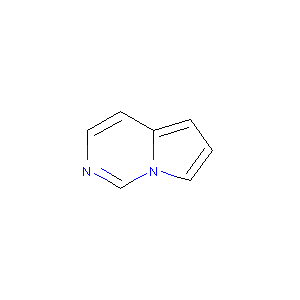

In [52]:
Draw.MolToImage(m)

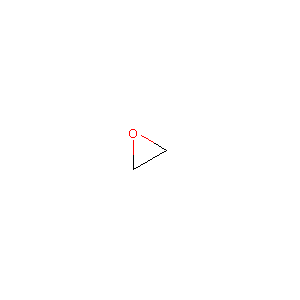

In [48]:
Draw.MolToImage(Chem.MolFromSmiles('C1OC1'))

### Daylight SMARTS

This is a representation of molecules used for searching and other purposes. Basically this is a regex on SMILES.

### Molecular similarity with fingerprints

### Doing reaction prediction

Needs to specify a template given by grammar `reactants>>product`, `reactants` and `products` are molecules in SMARTS form, molecules arer separated by `.` Running a reaction, feed two Molecules that fit the SMARTS.

In [59]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))

In [60]:
len(ps)

4

In [62]:
AllChem.MolToSmiles(ps[0][0])

'NC1=CCCC(O)C1'

In [66]:
ps[3]

(<rdkit.Chem.rdchem.Mol at 0x11f7e88c8>,)

In [83]:
# example of mismatching Mols vs SMARTS
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OCC'), Chem.MolFromSmiles('C=CC(N)=C')))

In [84]:
len(ps)

0

In [85]:
Chem.SanitizeMol(Chem.MolFromSmiles('OCC'))

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

## Molecule properties

* `rdkit.Chem.Crippen.MolLogP` - LogP
* `rdkit.Chem.QED.QEDproperties`
* `sasscorer.py`: https://github.com/kevinid/molecule_generator/blob/master/rdkit_contrib/sascorer.py

In [2]:
import rdkit_contrib

## Graph kernels

In [3]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('C1OC1')

In [4]:
def mol2graph(m1):
    """
    Convert molecule to nx.Graph

    Adapted from
    https://iwatobipen.wordpress.com/2016/12/30/convert-rdkit-molecule-object-to-igraph-graph-object/
    """
    admatrix = Chem.rdmolops.GetAdjacencyMatrix(m1)
    bondidxs = [( b.GetBeginAtomIdx(),b.GetEndAtomIdx() ) for b in m1.GetBonds()]
    graph = nx.Graph(admatrix)

    for idx in graph.nodes:
        graph.nodes[idx]["AtomicNum"] = m1.GetAtomWithIdx(idx).GetAtomicNum()
        graph.nodes[idx]["AtomicSymbol"] = m1.GetAtomWithIdx(idx).GetSymbol()

    for bd in bondidxs:
        btype = m1.GetBondBetweenAtoms(bd[0], bd[1]).GetBondTypeAsDouble()
        graph.edges[bd[0], bd[1]]["BondType"] = str(int(btype))
        # print(bd, m1.GetBondBetweenAtoms(bd[0], bd[1]).GetBondTypeAsDouble())
    return graph

In [44]:
mol = Chem.MolFromSmiles( "CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@H](N)C1" )
graph = mol2graph(mol)

/Users/ksk/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


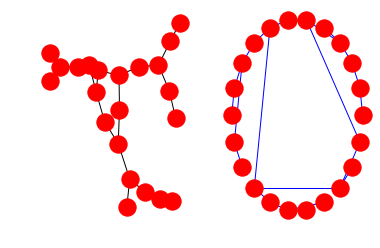

In [45]:
# Plotting this test graph
plt.subplot(121)
nx.draw(graph)
plt.subplot(122)
nx.draw(graph, pos=nx.circular_layout(graph), nodecolor='r', edge_color='b')
plt.show()

In [5]:
g1 = mol2graph(m1)
g2 = mol2graph(m2)

/Users/ksk/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


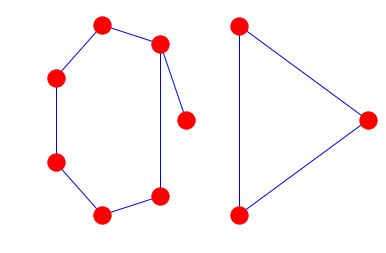

In [6]:
plt.subplot(121)
nx.draw(g1, pos=nx.circular_layout(g1), nodecolor='r', edge_color='b')
plt.subplot(122)
nx.draw(g2, pos=nx.circular_layout(g2), nodecolor='r', edge_color='b')
plt.show()

### Usage examples for different graph kernels

In [ ]:
# imports (temporary)
import sys
print(sys.path)
sys.path.append("/Users/ksk/Desktop/CMU/DOE/py-graph/")

from pygraph.kernels.weisfeilerLehmanKernel import weisfeilerlehmankernel
from pygraph.kernels.cyclicPatternKernel import cyclicpatternkernel

In [51]:
# looks like this is not too good for molecules
weisfeilerlehmankernel([g1, g1])


 --- Weisfeiler-Lehman subtree kernel matrix of size 2 built in 0.000331878662109375 seconds ---


(array([[0., 0.],
        [0., 0.]]), 0.000331878662109375)

In [49]:
cyclicpatternkernel([g1, g2], node_label="AtomicSymbol", edge_label="BondType")





retrieve patterns:   0%|          | 0/2 [00:00<?, ?it/s]



retrieve patterns: 100%|██████████| 2/2 [00:00<00:00, 277.13it/s]



calculate kernels:   0%|          | 0/2 [00:00<?, ?it/s]



calculate kernels: 100%|██████████| 2/2 [00:00<00:00, 1345.84it/s]
 --- kernel matrix of cyclic pattern kernel of size 2 built in 0.02325916290283203 seconds ---


(array([[2., 1.],
        [1., 4.]]), 0.02325916290283203)

In [30]:
g1.node[0]

{'AtomicNum': 6, 'AtomicSymbol': 'C'}